<a href="https://colab.research.google.com/github/genterist/BKT-Jupyter/blob/master/BKT_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://brand.ncsu.edu/img/logo/brick2x2.jpg =170x)

## **DEPARTMENT OF COMPUTER SCIENCE - CSC591 FALL 2018 Edu Tech**
	
###TAM N. NGUYEN

In [9]:
# PLEASE RUN THIS FIRST

import sys
version = sys.version_info[0], sys.version_info[1]
print("Running on Python {}.{}".format(version[0], version[1]))

# Imports for all questions
import math as m
import numpy as np
import pandas as pd
#from google.colab import files
import matplotlib.pyplot as plt
import altair as alt
#from sklearn import preprocessing, svm
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import LeaveOneOut
#from sklearn import metrics
#from math import sqrt
#from keras.models import Sequential
#from keras.layers import Dense
#from itertools import combinations
#
# ATTENTION
#
# Please read README file to run codes properly in Jupyter Notebook
#
# Running on Google Colab notebook will require manual upload of CSV files to the "Files" section
# in the left column of the interface. 


Running on Python 2.7


### DATA IMPORT and PRE-PROCESSING

In [2]:
# for Google Colab, make sure you upload data at the beginning of EACH new session
# make sure you run code block 1 of this jupyter notebook (for imports)
#
raw_data = pd.read_csv('./data.csv', sep=',')
raw_data.shape

(36627, 10)

In [3]:
# original structure
raw_data.head(3)

,Student,StepID,Correct,KC_1,KC_27,KC_24,KC_14,KC_22,KC_20,KC_21
0,stu1,478,0,0,1,0,0,0,0,0
1,stu1,479,1,0,1,0,0,0,0,0
2,stu1,484,1,0,1,0,0,0,0,0


In [4]:
# turning it to a multi-index DF
mod1_data = raw_data.set_index(['Student','StepID'])

#make sure everything is in order
mod1_data.sortlevel(inplace=True)

# insert collumns for the probabilities
# hard-coding of columns is fine here since this is a simulated scenario
# real life situations may involve json or
# regular db which is much more organized

mod1_data.insert(2,'P(L)1',0.0)
mod1_data.insert(3,'P(C)1',0.0)

mod1_data.insert(5,'P(L)27',0.0)
mod1_data.insert(6,'P(C)27',0.0)

mod1_data.insert(8,'P(L)24',0.0)
mod1_data.insert(9,'P(C)24',0.0)

mod1_data.insert(11,'P(L)14',0.0)
mod1_data.insert(12,'P(C)14',0.0)

mod1_data.insert(14,'P(L)22',0.0)
mod1_data.insert(15,'P(C)22',0.0)

mod1_data.insert(17,'P(L)20',0.0)
mod1_data.insert(18,'P(C)20',0.0)

mod1_data.insert(20,'P(L)21',0.0)
mod1_data.insert(21,'P(C)21',0.0)

# only P(C) matter since it has other Probabilities embedded in it

mod1_data.head(5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  after removing the cwd from sys.path.


Correct  KC_1  P(L)1  P(C)1  KC_27  P(L)27  P(C)27  KC_24  \
Student StepID                                                              
stu1    478           0     0    0.0    0.0      1     0.0     0.0      0   
        479           1     0    0.0    0.0      1     0.0     0.0      0   
        484           1     0    0.0    0.0      1     0.0     0.0      0   
        485           1     0    0.0    0.0      1     0.0     0.0      0   
        497           1     0    0.0    0.0      0     0.0     0.0      0   

                P(L)24  P(C)24   ...    P(C)14  KC_22  P(L)22  P(C)22  KC_20  \
Student StepID                   ...                                           
stu1    478        0.0     0.0   ...       0.0      0     0.0     0.0      0   
        479        0.0     0.0   ...       0.0      0     0.0     0.0      0   
        484        0.0     0.0   ...       0.0      0     0.0     0.0      0   
        485        0.0     0.0   ...       0.0      0     0.0     0.0      0   
        497        0.0     0.0   ...       0.0      1     0.0     0.0      0   

                P(L)20  P(C)20  KC_21  P(L)21  P(C)21  
Student StepID                                         
stu1    478        0.0     0.0      0     0.0     0.0  
        479        0.0     0.0      0     0.0     0.0  
        484        0.0     0.0      0     0.0     0.0  
        485        0.0     0.0      0     0.0     0.0  
        497        0.0     0.0      0     0.0     0.0  

[5 rows x 22 columns]

### PROBABILITY FUNCTIONS

![alt text](https://i.imgur.com/DbDMC5d.png)

Credit: wikipedia

u : student \\
k : skill \\
function d: skill mastery \\
function e: correct application of skill in the future

We assume these following parameters are fixed:

P(Lo) = 0.5

P(T) = 0.1

P(S) = 0.1

P(G) = 0.1

per

Hawkins W.J., Heffernan N.T., Baker R.S.J.D. (2014) **Learning Bayesian Knowledge Tracing Parameters with a Knowledge Heuristic and Empirical Probabilities.** In: Trausan-Matu S., Boyer K.E., Crosby M., Panourgia K. (eds) Intelligent Tutoring Systems. ITS 2014. Lecture Notes in Computer Science, vol 8474. Springer, Cham

Previous efforts regarding the science behind the setting of these parameters can be found in papers such as:

Yudelson M.V., Koedinger K.R., Gordon G.J. (2013) I**ndividualized Bayesian Knowledge Tracing Models**. In: Lane H.C., Yacef K., Mostow J., Pavlik P. (eds) Artificial Intelligence in Education. AIED 2013. Lecture Notes in Computer Science, vol 7926. Springer, Berlin, Heidelberg

We can also use machine learning approaches to change these parameters along the way.



In [0]:
P_L0 = 0.5
P_T = 0.1
P_S = 0.2
P_G = 0.2

#function definition here

def P_L_func ( correct, P_L_previous):
  
  if correct==1:
    P_L_obs = (P_L_previous*(1-P_S))/(P_L_previous*(1-P_S) + (1-P_L_previous)*(1-P_G))
  else:
    P_L_obs = (P_L_previous*P_S)/(P_L_previous*P_S + (1-P_L_previous)*(1-P_G))
  
  P_L_current = P_L_obs + (1-P_L_obs)*P_T
  
  return P_L_current

def P_C_func (P_L_previous):
  P_C_current = P_L_previous*(1-P_S) + (1-P_L_previous)*P_G
  
  return P_C_current

### FILLING IN CALCULATED RESULTS



In [32]:
for Student, stuInfo in mod1_data.groupby(level=[0]):
  rows = len(stuInfo.index)
  row_loc = 0

  print('Student ID: %s' %(Student))
  
  # set the innitial P
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(L)1')] = P_L0
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(C)1')] = P_L0

  stuInfo.iloc[0,stuInfo.columns.get_loc('P(L)27')] = P_L0
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(C)27')] = P_L0

  stuInfo.iloc[0,stuInfo.columns.get_loc('P(L)24')] = P_L0
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(C)24')] = P_L0

  stuInfo.iloc[0,stuInfo.columns.get_loc('P(L)14')] = P_L0
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(C)14')] = P_L0

  stuInfo.iloc[0,stuInfo.columns.get_loc('P(L)22')] = P_L0
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(C)22')] = P_L0

  stuInfo.iloc[0,stuInfo.columns.get_loc('P(L)20')] = P_L0
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(C)20')] = P_L0

  stuInfo.iloc[0,stuInfo.columns.get_loc('P(L)21')] = P_L0
  stuInfo.iloc[0,stuInfo.columns.get_loc('P(C)21')] = P_L0
  
  # now filling in values in a per-column fashion
  for index, row in stuInfo.iterrows():
    
    # the first row was innitialized so we skip it now
    if row_loc >0:
    
      #going over KC_1	
      if stuInfo.iloc[row_loc]['KC_1'] == 0.0:
        #if the skill is not tested then P(L) and P(C) are unchanged and will be copied over
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)1')] = stuInfo.iloc[row_loc-1]['P(L)1']
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)1')] = stuInfo.iloc[row_loc-1]['P(C)1']
      else:
        #if the skill is tested, change P(L) and P(C) accordingly
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)1')] = P_L_func ( stuInfo.iloc[row_loc]['Correct'], stuInfo.iloc[row_loc-1]['P(L)1'])
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)1')] = P_C_func ( stuInfo.iloc[row_loc-1]['P(L)1'])
    
    
      #going over KC_27
      if stuInfo.iloc[row_loc]['KC_27'] == 0.0:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)27')] = stuInfo.iloc[row_loc-1]['P(L)27']
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)27')] = stuInfo.iloc[row_loc-1]['P(C)27']
      else:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)27')] = P_L_func ( stuInfo.iloc[row_loc]['Correct'], stuInfo.iloc[row_loc-1]['P(L)27'])
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)27')] = P_C_func ( stuInfo.iloc[row_loc-1]['P(L)27'])      
    
    
      #going over KC_24	
      if stuInfo.iloc[row_loc]['KC_24'] == 0.0:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)24')] = stuInfo.iloc[row_loc-1]['P(L)24']
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)24')] = stuInfo.iloc[row_loc-1]['P(C)24']
      else:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)24')] = P_L_func ( stuInfo.iloc[row_loc]['Correct'], stuInfo.iloc[row_loc-1]['P(L)24'])
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)24')] = P_C_func ( stuInfo.iloc[row_loc-1]['P(L)24'])
        
      #going over KC_14	
      if stuInfo.iloc[row_loc]['KC_14'] == 0.0:
        #if the skill is not tested then P(L) and P(C) are unchanged and will be copied over
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)14')] = stuInfo.iloc[row_loc-1]['P(L)14']
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)14')] = stuInfo.iloc[row_loc-1]['P(C)14']
      else:
        #if the skill is tested, change P(L) and P(C) accordingly
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)14')] = P_L_func ( stuInfo.iloc[row_loc]['Correct'], stuInfo.iloc[row_loc-1]['P(L)14'])
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)14')] = P_C_func ( stuInfo.iloc[row_loc-1]['P(L)14'])
        
      #going over KC_22	
      if stuInfo.iloc[row_loc]['KC_22'] == 0.0:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)22')] = stuInfo.iloc[row_loc-1]['P(L)22']
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)22')] = stuInfo.iloc[row_loc-1]['P(C)22']
      else:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)22')] = P_L_func ( stuInfo.iloc[row_loc]['Correct'], stuInfo.iloc[row_loc-1]['P(L)22'])
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)22')] = P_C_func ( stuInfo.iloc[row_loc-1]['P(L)22'])
        
      #going over KC_20	
      if stuInfo.iloc[row_loc]['KC_20'] == 0.0:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)20')] = stuInfo.iloc[row_loc-1]['P(L)20']
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)20')] = stuInfo.iloc[row_loc-1]['P(C)20']
      else:
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)20')] = P_L_func ( stuInfo.iloc[row_loc]['Correct'], stuInfo.iloc[row_loc-1]['P(L)20'])
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)20')] = P_C_func ( stuInfo.iloc[row_loc-1]['P(L)20'])
        
      #going over KC_21
      if stuInfo.iloc[row_loc]['KC_21'] == 0.0:
        #if the skill is not tested then P(L) and P(C) are unchanged and will be copied over
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)21')] = stuInfo.iloc[row_loc-1]['P(L)21']
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)21')] = stuInfo.iloc[row_loc-1]['P(C)21']
      else:
        #if the skill is tested, change P(L) and P(C) accordingly
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(L)21')] = P_L_func ( stuInfo.iloc[row_loc]['Correct'], stuInfo.iloc[row_loc-1]['P(L)21'])
        stuInfo.iloc[row_loc,stuInfo.columns.get_loc('P(C)21')] = P_C_func ( stuInfo.iloc[row_loc-1]['P(L)21'])
        
    if row_loc < rows: row_loc += 1
    #print row_loc #this is for step by step visual check
  
  # for checking results of each col
  # make sure "break" in the below line is enabled
  #print(stuInfo['P(L)1'],stuInfo['P(C)1'])
  
  #print(stuInfo.tail(1))
  
  stuInfo.to_csv(Student+'_double_S_G.csv', index=True, header=True, float_format='%.3f')
  #files.download(Student+'.csv')
  print('Saved %s rows' %(rows))
  #break here for outputing first student's results
  break
  
  # break here for trouble shooting the first student only
  #break
#mod1_data.head(5)

Student ID: stu1
Saved 311 rows


In [12]:
stuInfo

Correct  KC_1     P(L)1     P(C)1  KC_27    P(L)27    P(C)27  \
Student StepID                                                                 
stu98   464           1     0  0.500000  0.500000      0  0.500000  0.500000   
        478           0     0  0.500000  0.500000      1  0.190000  0.500000   
        484           1     0  0.500000  0.500000      1  0.271000  0.252000   
        485           1     0  0.500000  0.500000      1  0.343900  0.316800   
        494           1     0  0.500000  0.500000      0  0.343900  0.316800   
        500           0     0  0.500000  0.500000      0  0.343900  0.316800   
        531           1     0  0.500000  0.500000      0  0.343900  0.316800   
        546           0     0  0.500000  0.500000      0  0.343900  0.316800   
        549           1     0  0.500000  0.500000      0  0.343900  0.316800   
        550           1     0  0.500000  0.500000      0  0.343900  0.316800   
        593           0     0  0.500000  0.500000      0  0.343900  0.316800   
        596           1     0  0.500000  0.500000      0  0.343900  0.316800   
        597           1     0  0.500000  0.500000      0  0.343900  0.316800   
        686           1     0  0.500000  0.500000      0  0.343900  0.316800   
        698           1     0  0.500000  0.500000      0  0.343900  0.316800   
        709           1     0  0.500000  0.500000      0  0.343900  0.316800   
        741           0     0  0.500000  0.500000      0  0.343900  0.316800   
        757           1     0  0.500000  0.500000      0  0.343900  0.316800   
        770           1     0  0.500000  0.500000      0  0.343900  0.316800   
        805           0     0  0.500000  0.500000      0  0.343900  0.316800   
        820           1     0  0.500000  0.500000      0  0.343900  0.316800   
        863           1     0  0.500000  0.500000      0  0.343900  0.316800   
        904           1     0  0.500000  0.500000      0  0.343900  0.316800   
        975           0     0  0.500000  0.500000      0  0.343900  0.316800   
        992           1     0  0.500000  0.500000      0  0.343900  0.316800   
        1067          1     0  0.500000  0.500000      0  0.343900  0.316800   
        1297          1     0  0.500000  0.500000      0  0.343900  0.316800   
        1304          1     0  0.500000  0.500000      0  0.343900  0.316800   
        1310          1     0  0.500000  0.500000      1  0.409510  0.375120   
        1317          1     0  0.500000  0.500000      0  0.409510  0.375120   
...                 ...   ...       ...       ...    ...       ...       ...   
        4249          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4256          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4267          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4280          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4287          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4289          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4290          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4291          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4292          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4414          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4416          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4418          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4452          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4459          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4464          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4492          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4526          1     0  0.569533  0.517362      0  0.418711  0.383299   
        4532    

### ANALYSIS

The below graphs show different scenarios with different innitial values of P(G), P(S), P(T)

In [0]:
# import back exported sample data
stu1_data_1 = pd.read_csv('./stu1.csv', sep=',')
stu1_data_2 = pd.read_csv('./stu1_double_P_T.csv', sep=',')
stu1_data_3 = pd.read_csv('./stu1_double_S_G.csv', sep=',')

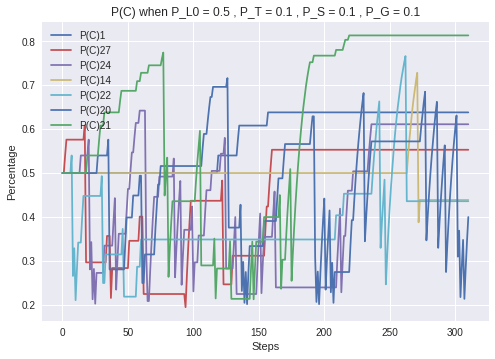

In [29]:
df = stu1_data_1

ax = df.plot(x=df.index, y="P(C)1")
ax.set(xlabel='Steps', ylabel='Percentage',
       title='P(C) when P_L0 = 0.5 , P_T = 0.1 , P_S = 0.1 , P_G = 0.1')
df.plot(x=df.index, y="P(C)27", ax=ax, color="C2")
df.plot(x=df.index, y="P(C)24",ax=ax, color="C3")
df.plot(x=df.index, y="P(C)14",ax=ax, color="C4")
df.plot(x=df.index, y="P(C)22",ax=ax, color="C5")
df.plot(x=df.index, y="P(C)20",ax=ax, color="C6")
df.plot(x=df.index, y="P(C)21",ax=ax, color="C7")

plt.show()

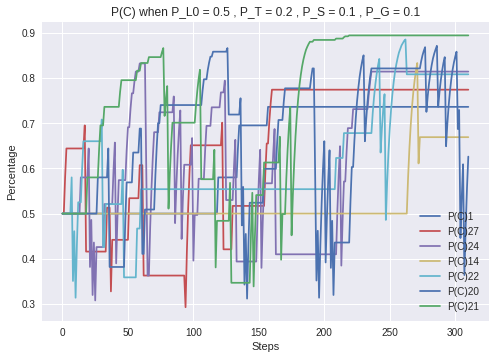

In [30]:
df = stu1_data_2

ax = df.plot(x=df.index, y="P(C)1")
ax.set(xlabel='Steps', ylabel='Percentage',
       title='P(C) when P_L0 = 0.5 , P_T = 0.2 , P_S = 0.1 , P_G = 0.1')
df.plot(x=df.index, y="P(C)27", ax=ax, color="C2")
df.plot(x=df.index, y="P(C)24",ax=ax, color="C3")
df.plot(x=df.index, y="P(C)14",ax=ax, color="C4")
df.plot(x=df.index, y="P(C)22",ax=ax, color="C5")
df.plot(x=df.index, y="P(C)20",ax=ax, color="C6")
df.plot(x=df.index, y="P(C)21",ax=ax, color="C7")

plt.show()

#### When P(T) got increased by 10%

In this case, P(T) = 0.2 instead of 0.1 by default. We note that the whole landscape remains almost the same but was moved up by 0.1 (10%).

This means P(T) affects P(C) directly and should be considered carefully

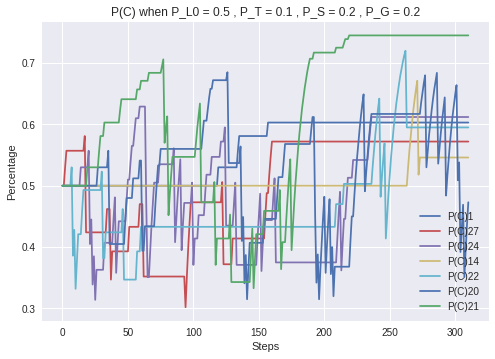

In [34]:
df = stu1_data_3

ax = df.plot(x=df.index, y="P(C)1")
ax.set(xlabel='Steps', ylabel='Percentage',
       title='P(C) when P_L0 = 0.5 , P_T = 0.1 , P_S = 0.2 , P_G = 0.2')
df.plot(x=df.index, y="P(C)27", ax=ax, color="C2")
df.plot(x=df.index, y="P(C)24",ax=ax, color="C3")
df.plot(x=df.index, y="P(C)14",ax=ax, color="C4")
df.plot(x=df.index, y="P(C)22",ax=ax, color="C5")
df.plot(x=df.index, y="P(C)20",ax=ax, color="C6")
df.plot(x=df.index, y="P(C)21",ax=ax, color="C7")

plt.show()

#### When P(S) and P(G) got increased by 10%

We note that the landscape shrinked towards the inside - meaning the bottom line got moved up (10% to 0.3) and the ceiling got lowered down (for approximately the same percentage)

#### The limits on how far P(T), P(S), P(G) can go

We note that the innitial value of P(L) = 0.5 makes sense. Therefore, other innitial values should not go over 0.5 as well. We can increase P(T) in order to raise the bottom line, increase P(S) and P(G) to reduce the margins between the top and the bottom lines. How much of an increase is dependent on specific domain knowledge as well as familiarity with students' innitial skill levels.